In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
library(raster)

Loading required package: sp

Attaching package: ‘raster’

The following object is masked from ‘package:dplyr’:

    select

The following object is masked from ‘package:tidyr’:

    extract



In [4]:
#list files that start with the word "Product" followed by anything and ending with the word "xlsx":
masks <- list.files(path = "~/veg",pattern = "^mask/(.*)tif$",recursive = TRUE)

In [5]:
masks

character(0)

In [6]:
# get all the rasters aso tiles
#list files in a specific folder
veg_aso <- list.files(path = "~/veg")

In [7]:
asos <- list()
preds <-list()
for (vaso in veg_aso)
{
    #print(vaso)
    recur = list.files(path=paste("~/veg/",vaso,sep=""),recursive = TRUE)
    #print(recur)
    for (filename in recur)
        {
          if (startsWith(filename,'mask/') & endsWith(filename,"merged.tif"))
              asos <- append(asos,paste("~/veg/",vaso,"/",filename,sep=""))
              
           if (startsWith(filename,'preds/') & endsWith(filename,"merged.tif"))
              preds <- append(preds,paste("~/veg/",vaso,"/",filename,sep=""))    
        }
}

print(asos) 
print(preds)        
    

[[1]]
[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[2]]
[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[3]]
[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[4]]
[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181109_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[5]]
[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181110_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_U

In [8]:
aso_un <- unlist(asos)
pred_un <- unlist(preds)

In [9]:
c(aso_un)

[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [2] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [3] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [4] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181109_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [5] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181110_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [6] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181111_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [7] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181112_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [8] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181113_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [9] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181319_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[10] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181320_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[11] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181322_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[12] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181323_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

In [12]:
for (aso_i in aso_un) {
    
    print(crs(raster(aso_i)))
    print(extent(raster(aso_i)))
     print(res(raster(aso_i)))
}

CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
class       : Extent 
xmin        : -119.2017 
xmax        : -119.1907 
ymin        : 37.78808 
ymax        : 37.8228 
[1] 2.145767e-05 1.695663e-05
CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
class       : Extent 
xmin        : -119.2017 
xmax        : -119.1907 
ymin        : 37.7794 
ymax        : 37.78808 
[1] 2.145767e-05 1.695862e-05
CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
class       : Extent 
xmin        : -119.6411 
xmax        : -119.4763 
ymin        : 38.16912 
ymax        : 38.22955 
[1] 2.145767e-05 1.685681e-05
CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
class       : Extent 
xmin        : -119.6521 
xmax        : -119.3774 
ymin        : 38.09134 
ymax        : 38.19502 
[1] 2.145767e-05 1.688280e-05
CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,

In [13]:
ListRasters <- function(list_names) {
  raster_list <- list() # initialise the list of rasters
   for (i in 1:(length(list_names))){ 
    grd_name <- list_names[i] # list_names contains all the names of the images in .grd format
    raster_file <- raster(grd_name)  
   }
  raster_list <- append(raster_list, raster_file) # update raster_list at each iteration
}

In [37]:

ListRastersRep <- function(list_names) {
  raster_list <- list() # initialise the list of rasters
  f1_rast <- raster(list_names[1])  
   for (i in 1:(length(list_names))){ 
    grd_name <- list_names[i] # list_names contains all the names of the images in .grd format
    raster_file <- raster(grd_name)   
   }
   print(raster_file) 
  raster_list <- append(raster_list, raster_file) # update raster_list at each iteration
}

In [14]:
listpfimages <- c()
for (as in aso_un){
    listpfimages <- append(listpfimages,as)
}

In [15]:
f1 <- raster(listpfimages[1])

In [16]:
f3 <- raster(listpfimages[3])

In [17]:
res(f1)

[1] 2.145767e-05 1.695663e-05

In [18]:
res(f3)

[1] 2.145767e-05 1.685681e-05

In [48]:
crs(f1)

CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 

In [19]:
projectRaster(f3,f1)

class       : RasterLayer 
dimensions  : 2048, 512, 1048576  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.2017, -119.1907, 37.78808, 37.8228  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : ASO_3M_SD_USCATE_20180528_binary_merged 
values      : NA, NA  (min, max)


In [21]:
rlist <-sapply(c(aso_un[1],aso_un[2]), FUN = ListRasters)

In [64]:
rlist_v2 <-sapply(c(aso_un), FUN = ListRastersRep)

class       : RasterLayer 
dimensions  : 2048, 512, 1048576  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.2017, -119.1907, 37.78808, 37.8228  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif 
names       : ASO_3M_SD_USCATE_20180528_binary_merged 
values      : -32768, 32767  (min, max)

class       : RasterLayer 
dimensions  : 512, 512, 262144  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695862e-05  (x, y)
extent      : -119.2017, -119.1907, 37.7794, 37.78808  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-sno

In [42]:
rlist_v2

$`~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif`
class       : RasterLayer 
dimensions  : 2048, 512, 1048576  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.2017, -119.1907, 37.78808, 37.8228  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif 
names       : ASO_3M_SD_USCATE_20180528_binary_merged 
values      : -32768, 32767  (min, max)


$`~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif`


In [65]:
rlist_v3 <- rlist_v2
res(rlist_v2[[1]])

[1] 2.145767e-05 1.695663e-05

In [66]:
for (i in 2:length(rlist_v2))
{
        rlist_v3[i] <- projectRaster(rlist_v2[[i]],rlist_v2[[1]])
}
    

Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_v2[[i]], rlist_v2[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_v2[[i]], rlist_v2[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_v2[[i]], rlist_v2[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_v2[[i]], rlist_v2[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_v2[[i]], rlist_v2[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_v2[[i]], rlist_v2[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_v2[[i]], rlist_v2[[1]])):
“implicit list embedding of S4 objects is dep

In [71]:
rlist_v3

$`~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif`
class       : RasterLayer 
dimensions  : 2048, 512, 1048576  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.2017, -119.1907, 37.78808, 37.8228  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif 
names       : ASO_3M_SD_USCATE_20180528_binary_merged 
values      : -32768, 32767  (min, max)


$`~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif`


In [72]:
rlist <- rlist_v3

In [73]:
names(rlist)[1:2] <- c('x', 'y')
rlist$fun <- mean
rlist$na.rm <- TRUE

In [74]:
x <- do.call(mosaic, rlist)

In [77]:
res(x)

[1] 2.145767e-05 1.695663e-05

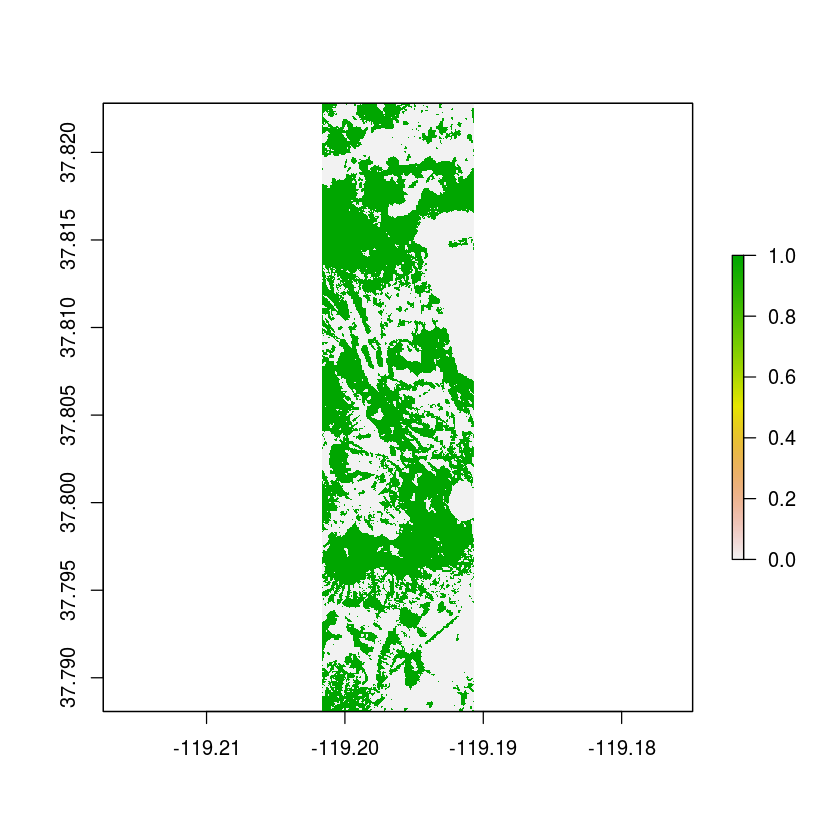

In [75]:
plot(x)

In [42]:
veg <- raster('~/planet-snowcover/pipeline/veg.tiff')

In [159]:
veg

class       : RasterLayer 
dimensions  : 14959, 19874, 297295166  (nrow, ncol, ncell)
resolution  : 3.115758e-05, 3.115758e-05  (x, y)
extent      : -119.8058, -119.1865, 37.72827, 38.19435  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/veg.tiff 
names       : veg 


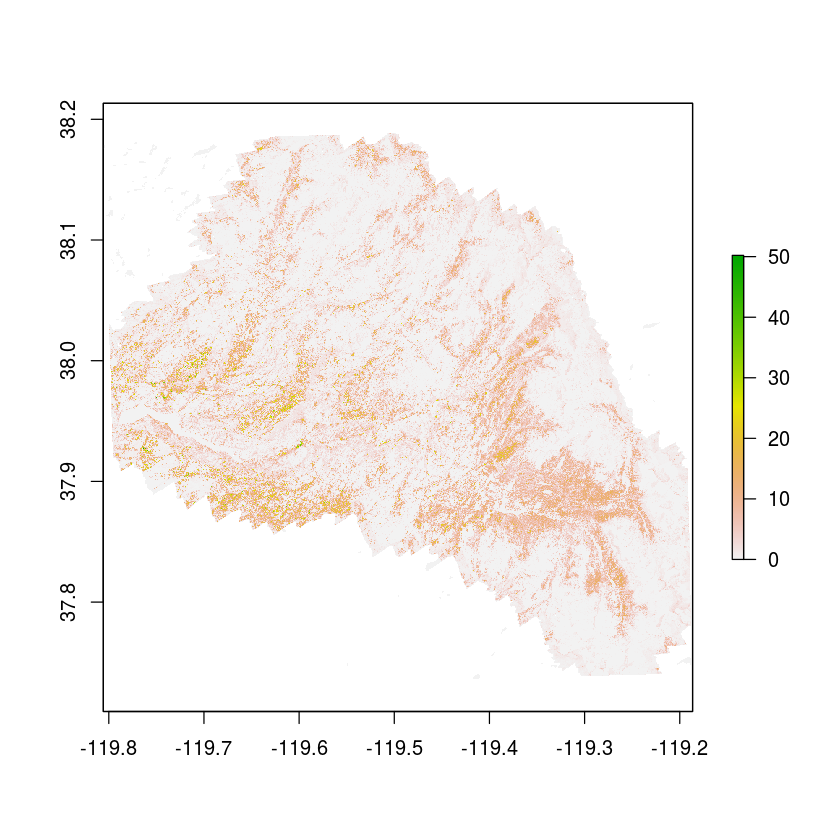

In [47]:
plot(veg)

In [46]:
extent_template <- extent(veg)
print(extent_template)

class       : Extent 
xmin        : -119.8058 
xmax        : -119.1865 
ymin        : 37.72827 
ymax        : 38.19435 


In [48]:
extent_template <- extent(veg)
template <- raster(extent_template)

In [49]:
crs(veg)

CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 

In [55]:
length(aso_un)

[1] 12

In [67]:
library("rgdal")
library("gdalUtils")

In [66]:
proj4string(template) <- crs(veg)

writeRaster(template, file="aso_test_veg.tif", format="GTiff")
mosaic_rasters(gdalfile=aso_un,dst_dataset="aso_test_veg.tif",of="GTiff")
#gdalinfo("aso_test_veg.tif")

Warning message in .local(x, filename, ...):
“all cell values are NA”Warning message:
“running command '"/home/ubuntu/anaconda3/envs/pytorch_p36/bin/gdalbuildvrt" -input_file_list "/tmp/RtmpSdP8X4/file36a53fb81b1e.txt" "/tmp/RtmpSdP8X4/file36a55b5c559c.vrt" ' had status 1”Warning message:
“running command '"/home/ubuntu/anaconda3/envs/pytorch_p36/bin/gdal_translate" -of "GTiff" "/tmp/RtmpSdP8X4/file36a55b5c559c.vrt" "aso_test_veg.tif"' had status 1”

NULL

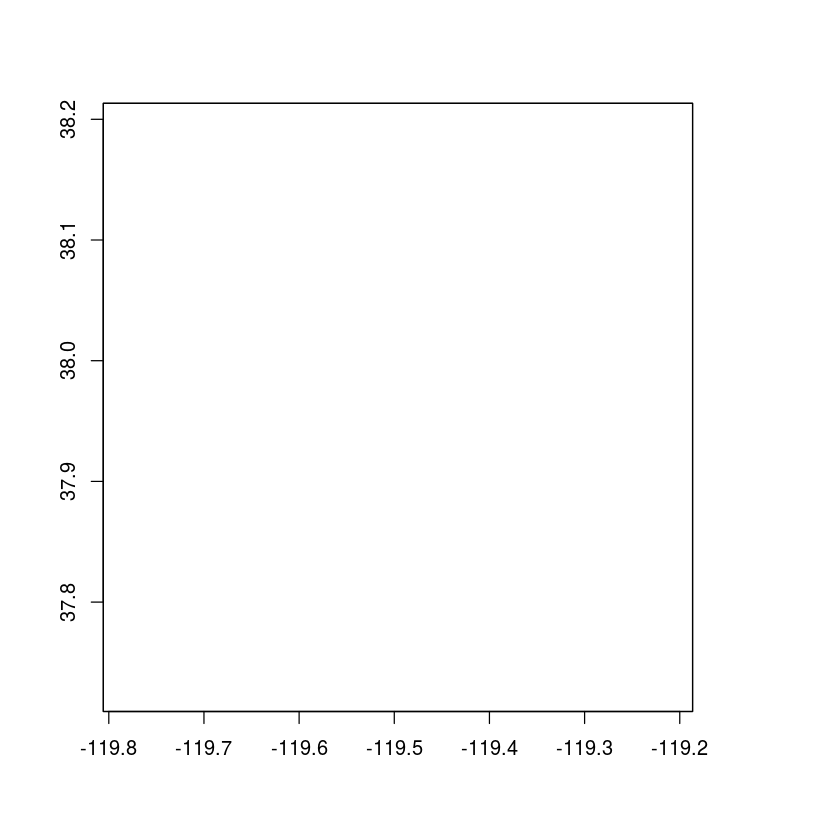

In [71]:
combined_aso <- raster('aso_test_veg.tif')
plot(combined_aso)

In [72]:
a <- c(aso_un[1],aso_un[2])
e <- extent(veg)
template <- raster(e)
proj4string(template) <- crs(crs(raster(aso_un[1])))
writeRaster(template, file="aso_test_veg.tif", format="GTiff")
mosaic_rasters(gdalfile=aso_un,dst_dataset="aso_test_veg.tif",of="GTiff")
#gdalinfo("aso_test_veg.tif")

Warning message in .local(x, filename, ...):
“all cell values are NA”

ERROR: Error in .getGDALtransient(x, filename = filename, options = options, : filename exists; use overwrite=TRUE


In [40]:
library(raster)
aso.mosaic <- do.call(stack, list(aso_un)) 

ERROR: Error in compareRaster(rasters): different extent
